In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df0 = pd.read_csv('/content/sample12.csv', index_col=0, parse_dates=True)
df0

,temp,year,month,day,hour,person,accum
date,,,,,,,
2021-01-01 00:00:00,-0.8,2021,1,1,0,0,0
2021-01-01 01:00:00,-1.8,2021,1,1,1,0,0
2021-01-01 02:00:00,-2.4,2021,1,1,2,1,1
2021-01-01 03:00:00,-2.9,2021,1,1,3,0,1
2021-01-01 04:00:00,-3.7,2021,1,1,4,0,1
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,3.9,2022,12,31,19,0,7
2022-12-31 20:00:00,3.1,2022,12,31,20,0,7
2022-12-31 21:00:00,2.4,2022,12,31,21,0,7


In [ ]:
df0 = df0.drop(['year','day','hour','month','temp','person'], axis=1)

In [ ]:
df0.reset_index(drop=False,inplace=True)
df0

,date,accum
0,2021-01-01 00:00:00,0
1,2021-01-01 01:00:00,0
2,2021-01-01 02:00:00,1
3,2021-01-01 03:00:00,1
4,2021-01-01 04:00:00,1
...,...,...
17515,2022-12-31 19:00:00,7
17516,2022-12-31 20:00:00,7
17517,2022-12-31 21:00:00,7
17518,2022-12-31 22:00:00,7


In [ ]:
testdata1 = df0.groupby([pd.Grouper(key='date',freq='2H')]).max()

In [ ]:
testdata1

,accum
date,
2021-01-01 00:00:00,0
2021-01-01 02:00:00,1
2021-01-01 04:00:00,2
2021-01-01 06:00:00,3
2021-01-01 08:00:00,3
...,...
2022-12-31 14:00:00,5
2022-12-31 16:00:00,6
2022-12-31 18:00:00,7


In [ ]:
testdata1.reset_index(drop=False, inplace=True)
testdata1

,date,accum
0,2021-01-01 00:00:00,0
1,2021-01-01 02:00:00,1
2,2021-01-01 04:00:00,2
3,2021-01-01 06:00:00,3
4,2021-01-01 08:00:00,3
...,...,...
8755,2022-12-31 14:00:00,5
8756,2022-12-31 16:00:00,6
8757,2022-12-31 18:00:00,7
8758,2022-12-31 20:00:00,7


In [ ]:
y_data = testdata1['date']

In [ ]:
y_data

0      2021-01-01 00:00:00
1      2021-01-01 02:00:00
2      2021-01-01 04:00:00
3      2021-01-01 06:00:00
4      2021-01-01 08:00:00
               ...        
8755   2022-12-31 14:00:00
8756   2022-12-31 16:00:00
8757   2022-12-31 18:00:00
8758   2022-12-31 20:00:00
8759   2022-12-31 22:00:00
Name: date, Length: 8760, dtype: datetime64[ns]

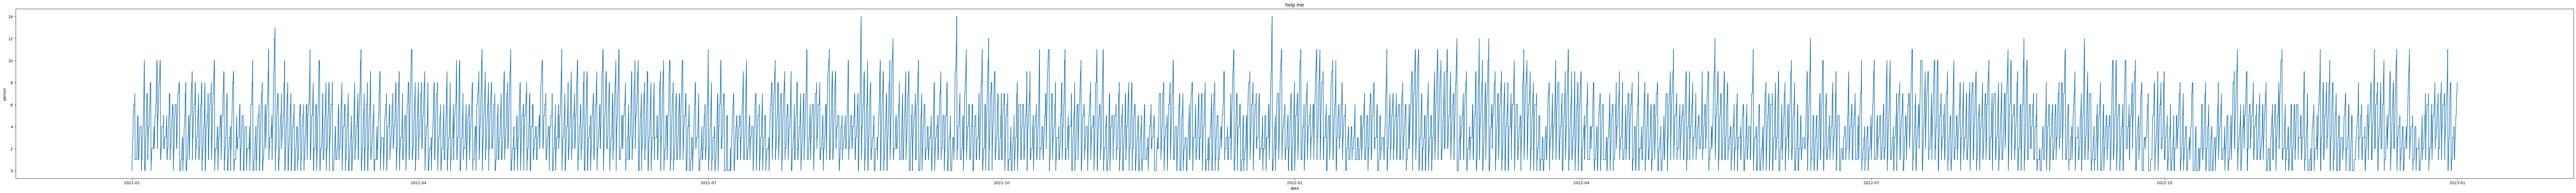

In [ ]:
plt.figure(figsize = (120,8))
plt.plot(y_data, testdata1.accum)
plt.title("help me")
plt.xlabel("date")
plt.ylabel("person")
plt.show()

In [ ]:
testdata1 = testdata1.set_index('date')

In [ ]:
ts = testdata1
ts

,accum
date,
2021-01-01 00:00:00,0
2021-01-01 02:00:00,1
2021-01-01 04:00:00,2
2021-01-01 06:00:00,3
2021-01-01 08:00:00,3
...,...
2022-12-31 14:00:00,5
2022-12-31 16:00:00,6
2022-12-31 18:00:00,7


<Figure size 640x480 with 0 Axes>

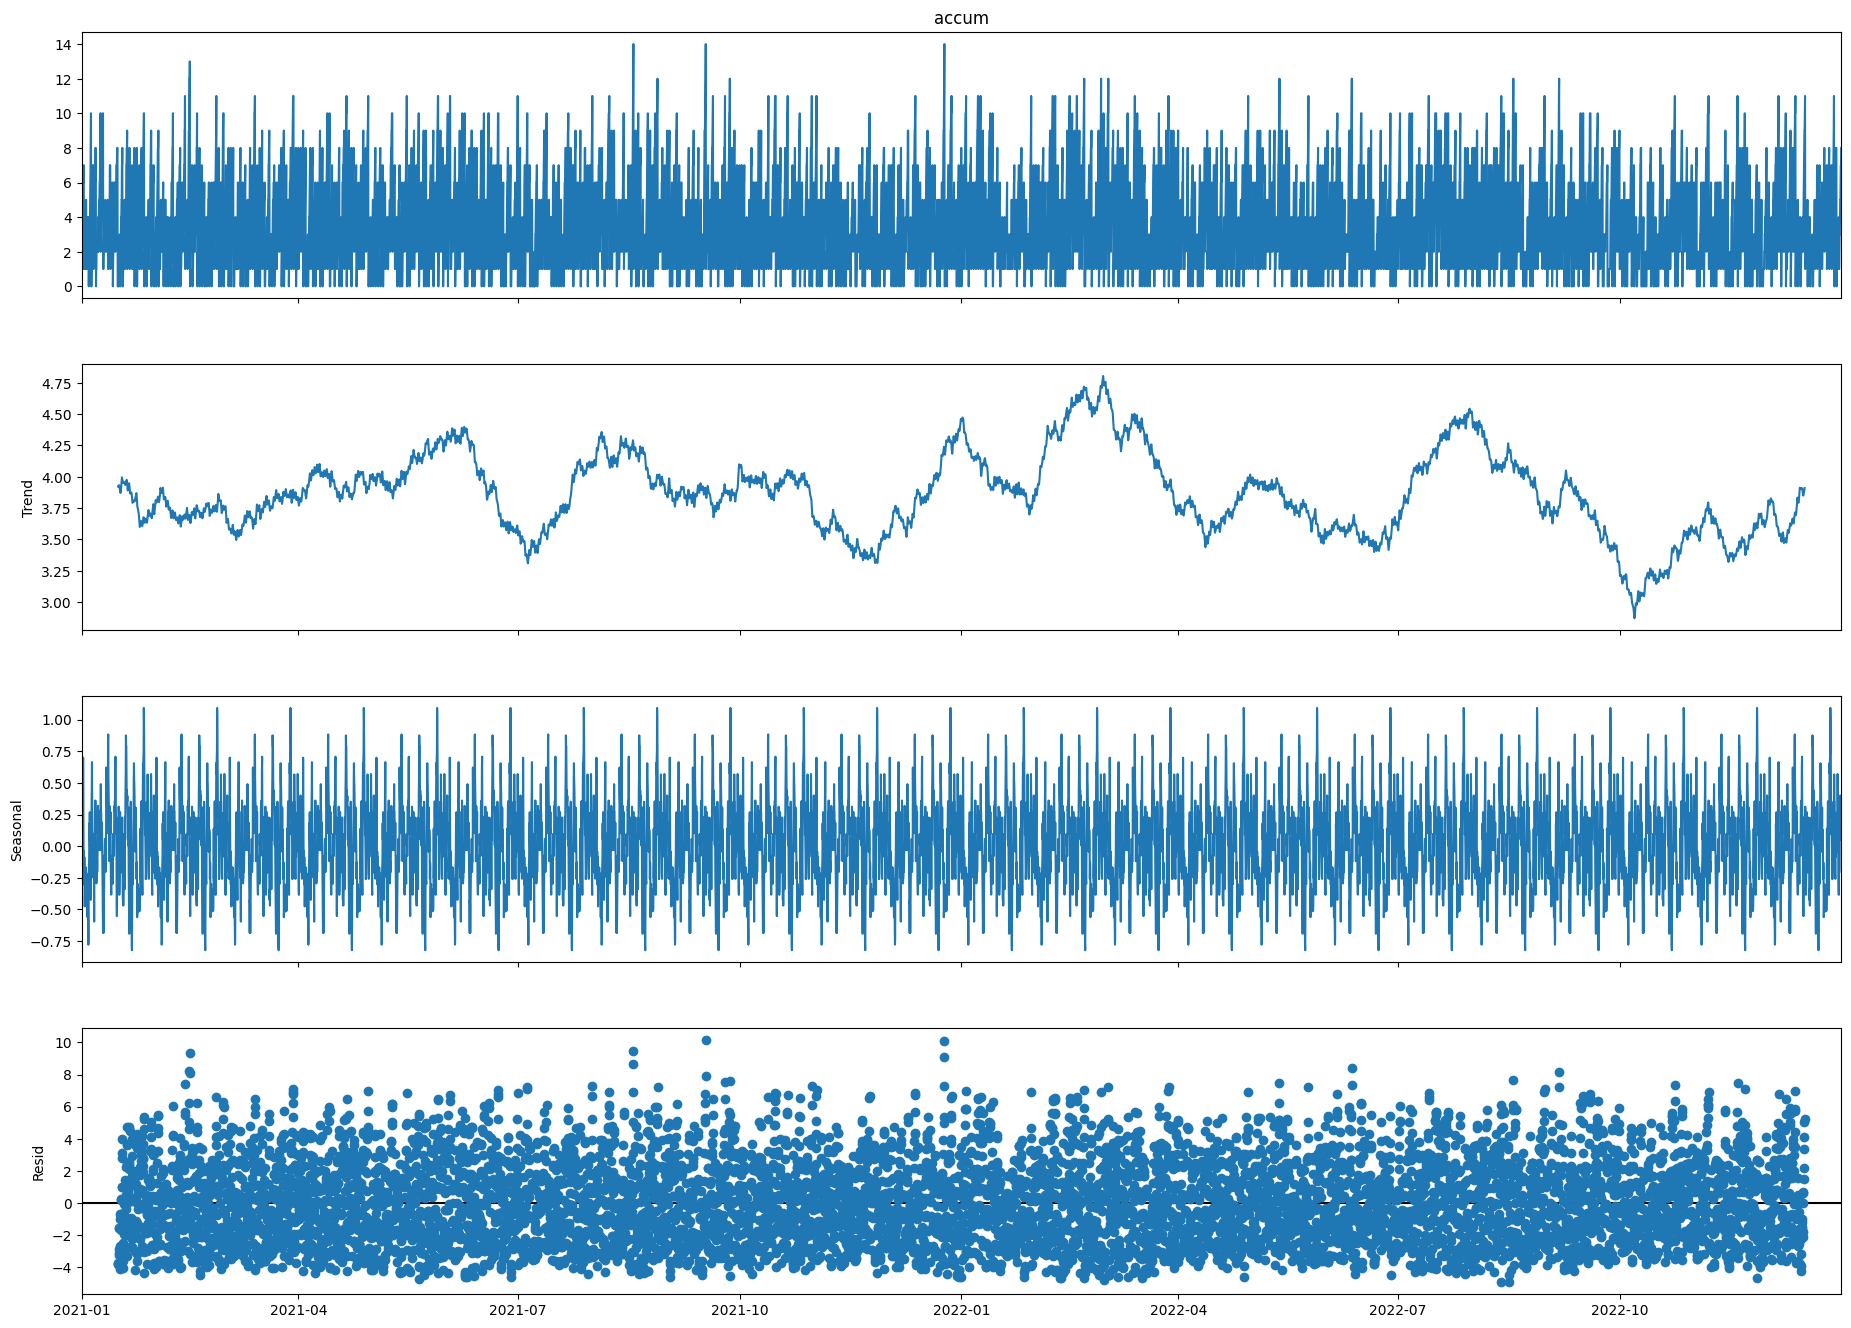

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['accum'], model = 'additive', period = 365)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 15)

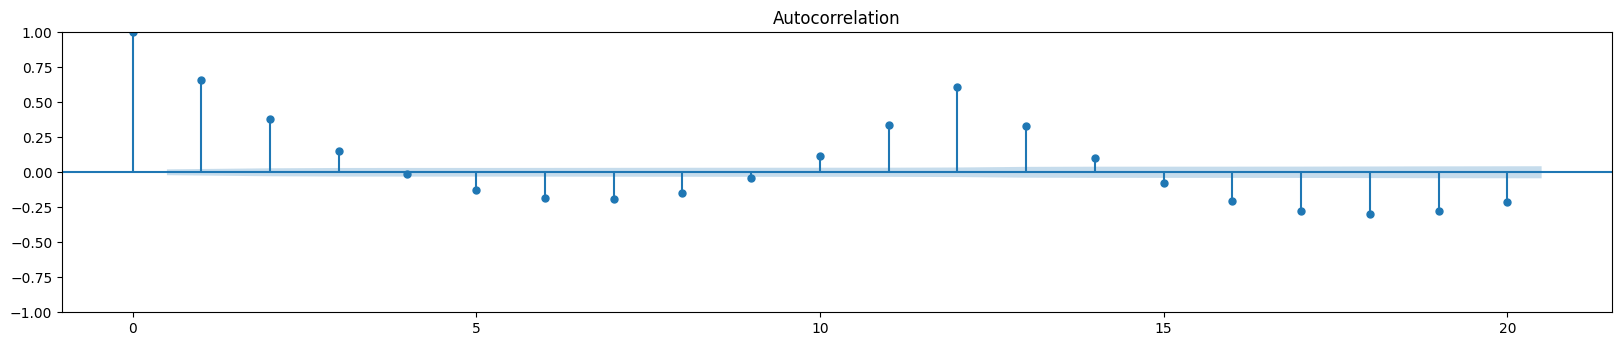

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags = 20, ax = ax1)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF Statistic : %f' % result[0])
print('p-value : %f'% result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s : %.3f' % (key, value))

ADF Statistic : -14.933250
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


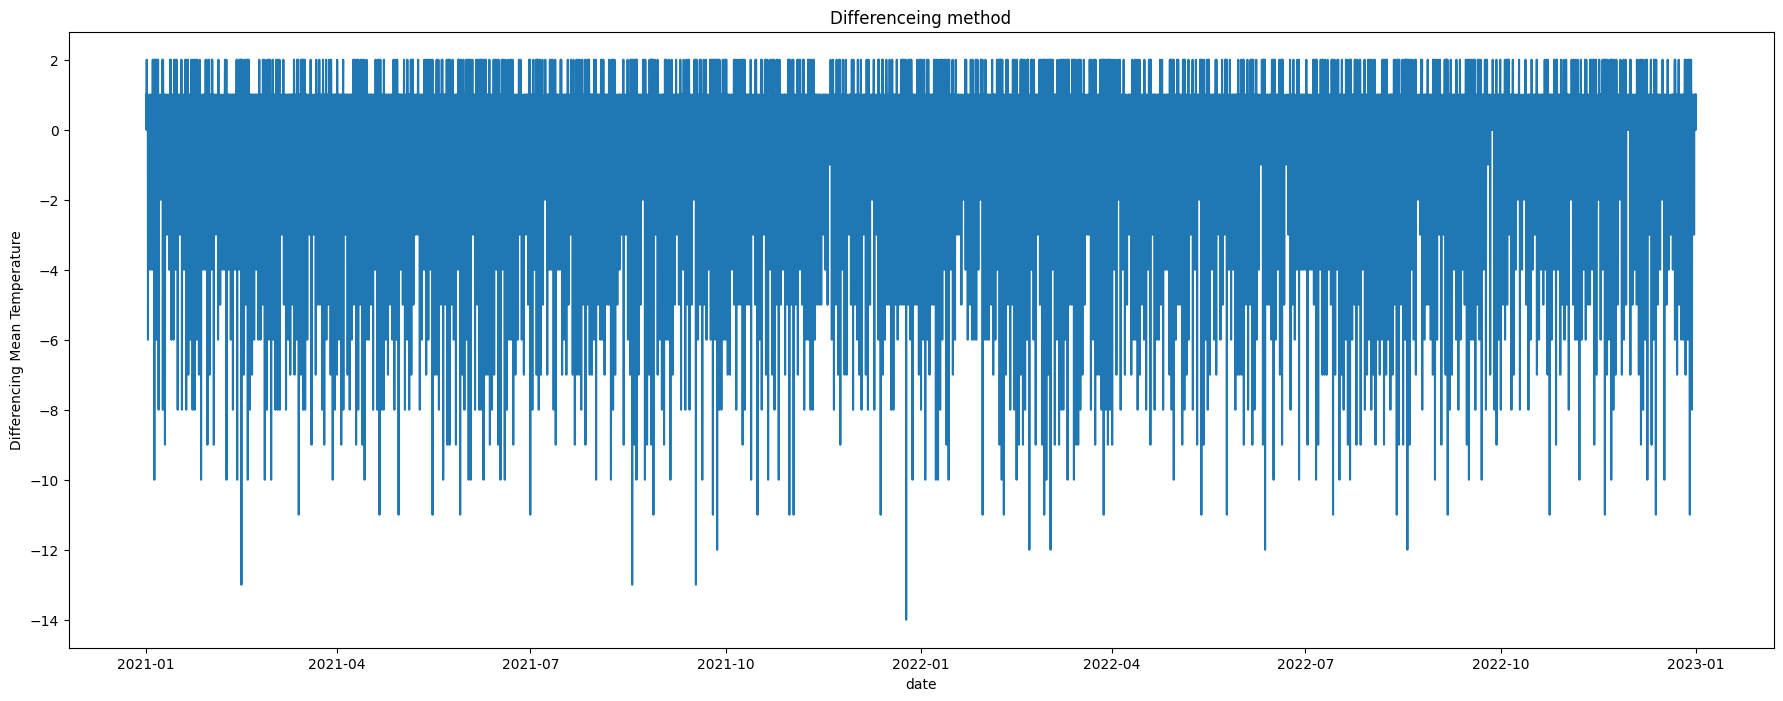

In [ ]:
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differenceing method")
plt.xlabel("date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [ ]:
result = adfuller(ts_diff[1:])
print('ADF Statistic: %f'% result[0])
print('p-value : %f'% result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s : %.3f' % (key, value))

ADF Statistic: -22.770520
p-value : 0.000000
Critical Values:
	1% : -3.431
	5% : -2.862
	10% : -2.567


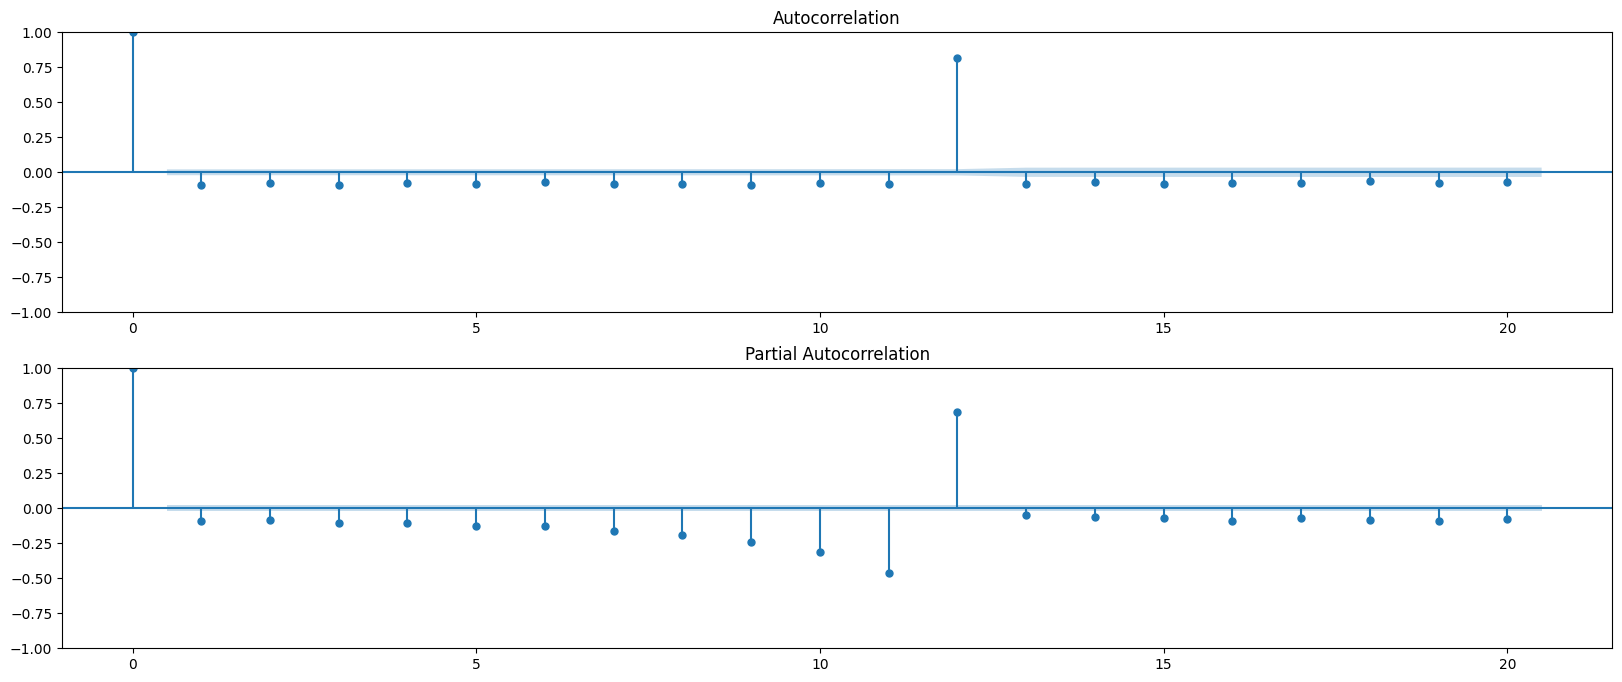

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags = 20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags = 20, ax=ax2)

<ipython-input-19-6ed585e54675>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting para

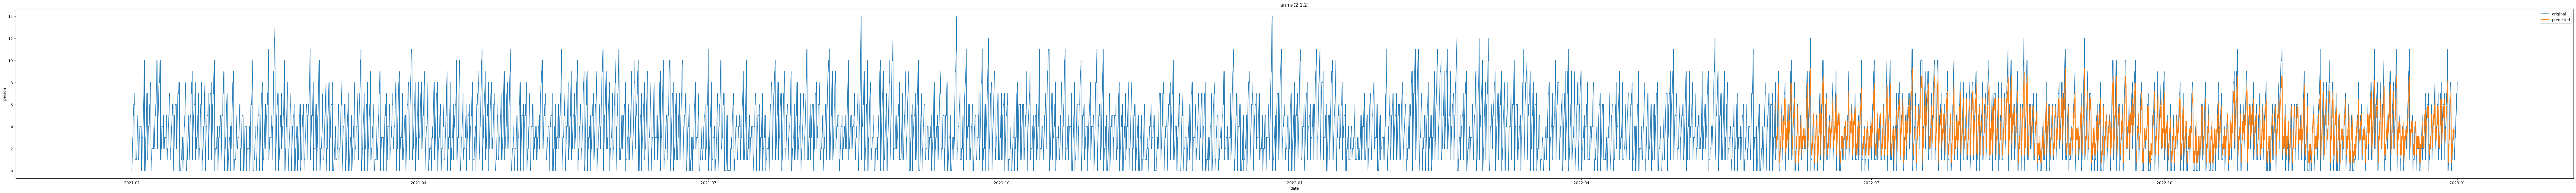

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime
import statsmodels.api as sm

# fit model
model = ARIMA(ts, order=(2,1,2))
model_fit = model.fit()

# predict
start_index = datetime(2022,6,1)
end_index = datetime(2022,12,31)
forecast = model_fit.predict(start = start_index, end = end_index, typ = 'levels')

# visualization
plt.figure(figsize = (120,8))
plt.plot(y_data, testdata1.accum, label = "original")
plt.plot(forecast, label = "predicted")
plt.title("arima(2,1,2)")
plt.xlabel("date")
plt.ylabel("person")
plt.legend()
plt.show()